In [ ]:
    # Import necessary libraries
import numpy as np                          # Numerical operations and arrays
import pandas as pd                         # Data manipulation and analysis (DataFrames)
from sklearn.datasets import load_wine     # Load Wine dataset (multi-class classification)
from sklearn.model_selection import train_test_split, GridSearchCV
# train_test_split: split data into training and testing subsets
# GridSearchCV: perform exhaustive search over hyperparameters with cross-validation
from sklearn.impute import SimpleImputer   # To fill missing values
from sklearn.preprocessing import StandardScaler, label_binarize
# StandardScaler: scale features to zero mean, unit variance
# label_binarize: binarize multi-class labels for ROC AUC calculation
from sklearn.ensemble import RandomForestClassifier
# Random Forest classifier - ensemble of decision trees for classification
from sklearn.tree import DecisionTreeClassifier
# Decision Tree classifier - tree-based classifier
from sklearn.metrics import (
    accuracy_score,     # Computes ratio of correct predictions
    f1_score,          # Harmonic mean of precision and recall
    recall_score,      # Ratio of correctly predicted positives
    confusion_matrix,  # Table of true vs predicted class counts
    roc_auc_score,     # Area Under ROC Curve (model's discrimination ability)
    roc_curve          # Calculate ROC curve points (FPR, TPR)
)
import matplotlib.pyplot as plt            # Plotting graphs
import seaborn as sns                      # Statistical data visualization
from imblearn.over_sampling import SMOTE  # Synthetic minority oversampling to balance classes

In [ ]:
# ---------------------------------------------
# 1. Load Wine dataset
# ---------------------------------------------

wine = load_wine()  # Loads dictionary-like object with data and metadata

# Convert numpy arrays into pandas DataFrame and Series for easier data handling
X = pd.DataFrame(wine.data, columns=wine.feature_names)
# X: Features dataframe, columns named after chemical properties of wines

y = pd.Series(wine.target, name='target')
# y: Target class labels as Series, named 'target'

# Display shape (rows, columns) of features and preview first 5 rows
print("Dataset shape:", X.shape)
print("First 5 rows of features:\n", X.head())
print("Target distribution:\n", y.value_counts())
# value_counts() counts how many instances per class

Dataset shape: (178, 13)
First 5 rows of features:
    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/o

In [ ]:
# Display data information (column types, non-null counts, memory usage)
print("\nData Information:")
X.info()

# Display descriptive statistics (count, mean, std, min, max, quartiles)
print("\nDescriptive Statistics:")
display(X.describe())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null   

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
X.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [ ]:
# 2. Handle missing values (Demonstration only)
# ---------------------------------------------
# calculate the missing value percentage
# Although Wine dataset has no missing values, this shows how to handle them

# Create SimpleImputer instance with strategy='mean' to replace NaNs with column mean
imputer = SimpleImputer(strategy='mean')

# fit_transform:
# - fit(): calculates mean for each column
# - transform(): replaces missing values in X
# The result is a numpy array, convert back to DataFrame with same columns
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Now X_imputed has no missing values (NaNs)

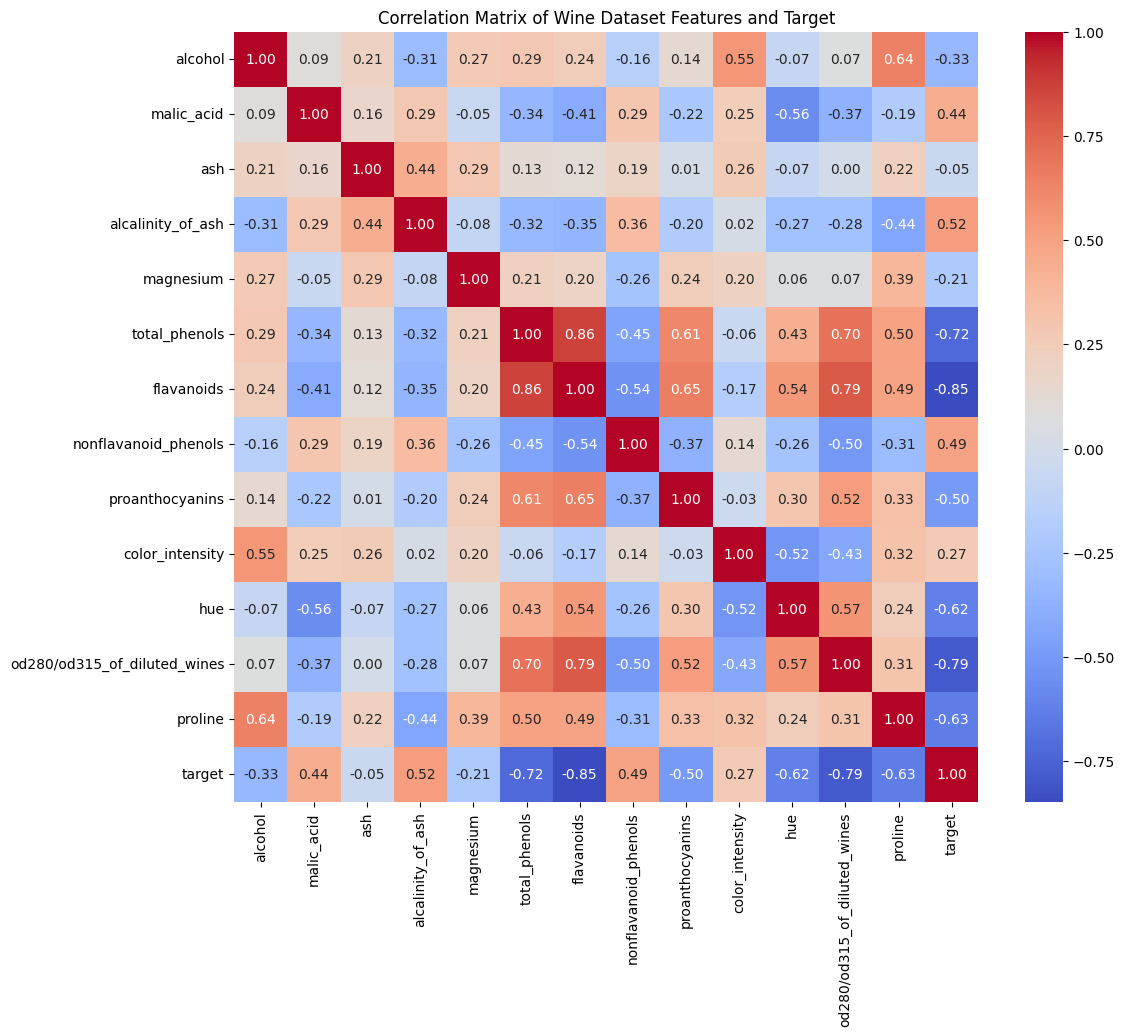

In [ ]:
# 3. Correlation matrix computation
# ---------------------------------------------

# Copy features and append target to compute correlation with target
df_corr = X_imputed.copy()
df_corr['target'] = y

# corr() computes pairwise Pearson correlation coefficients between columns
corr_matrix = df_corr.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_matrix,        # matrix to visualize
    annot=True,         # annotate cells with numeric correlation values
    cmap='coolwarm',    # color map: red-blue gradient showing -1 to 1 correlation
    fmt=".2f"           # format float numbers with 2 decimals
)
plt.title("Correlation Matrix of Wine Dataset Features and Target")
plt.show()

Feature Selection using correlation analysis

In [ ]:
# 4. Feature selection by correlation
# ---------------------------------------------

# Select correlations of each feature with target variable
target_corr = corr_matrix['target'].drop('target')
# .drop('target') removes self-correlation of 1.0

# Sort absolute correlations descending; take top 8 most correlated features
top_features = target_corr.abs().sort_values(ascending=False).head(8).index.tolist()

print("Top features selected based on absolute correlation with target:\n", top_features)

# Select those features from X_imputed for modeling
X_selected = X_imputed[top_features]

Top features selected based on absolute correlation with target:
 ['flavanoids', 'od280/od315_of_diluted_wines', 'total_phenols', 'proline', 'hue', 'alcalinity_of_ash', 'proanthocyanins', 'nonflavanoid_phenols']


Feature selection using Random Forest algorithm

In [ ]:
#feature selection using random forest algorithm also show how features and which features are selected

# Feature Selection using Random Forest

# Split data into training and testing sets
# stratify=y ensures proportional representation of classes in both sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Fit scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest classifier
# n_estimators: number of trees in the forest
# random_state for reproducibility
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances from the trained model
# These indicate the contribution of each feature to the model's prediction
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Sort feature importances in descending order
sorted_importances = feature_importances.sort_values(ascending=False)

# Print the sorted feature importances
print("\nFeature Importances (Random Forest):")
print(sorted_importances)

# Select top N features based on importance (e.g., top 8)
n_top_features_rf = 8
top_features_rf = sorted_importances.head(n_top_features_rf).index.tolist()

print(f"\nTop {n_top_features_rf} features selected by Random Forest:")
top_features_rf

# You can now use X_imputed[top_features_rf] for further modeling
# e.g., X_train_rf = X_train_scaled[:, [X_train.columns.get_loc(col) for col in top_features_rf]]
# X_test_rf = X_test_scaled[:, [X_test.columns.get_loc(col) for col in top_features_rf]]


Feature Importances (Random Forest):
alcohol                         0.162715
color_intensity                 0.159719
flavanoids                      0.156283
proline                         0.124081
hue                             0.111019
od280/od315_of_diluted_wines    0.098852
total_phenols                   0.042004
magnesium                       0.034591
malic_acid                      0.033700
alcalinity_of_ash               0.028841
proanthocyanins                 0.019952
ash                             0.016418
nonflavanoid_phenols            0.011825
dtype: float64

Top 8 features selected by Random Forest:


['alcohol',
 'color_intensity',
 'flavanoids',
 'proline',
 'hue',
 'od280/od315_of_diluted_wines',
 'total_phenols',
 'magnesium']

In [ ]:
# 5. Feature scaling with StandardScaler
# ---------------------------------------------

# StandardScaler standardizes features to mean=0, std=1
# Why? Many ML algorithms perform better when features are on similar scales
scaler = StandardScaler()

# fit_transform calculates mean/std on X_selected, scales data
X_scaled = scaler.fit_transform(X_selected)
# Returns numpy array (not DataFrame)

In [ ]:
# 6. Handle class imbalance using SMOTE
# ---------------------------------------------

# Synthetic Minority Oversampling Technique (SMOTE) balances classes by creating synthetic samples
# Here it's for demonstration because Wine dataset is fairly balanced
smote = SMOTE(random_state=42)
# random_state ensures reproducible synthetic samples

# fit_resample fits SMOTE on X_scaled and y, returns balanced X and y
X_bal, y_bal = smote.fit_resample(X_scaled, y)

print("Class distribution after SMOTE:\n", pd.Series(y_bal).value_counts())
# Shows counts of each class after oversampling

Class distribution after SMOTE:
 target
0    71
1    71
2    71
Name: count, dtype: int64


In [ ]:
# 7. Train-test split
# ---------------------------------------------

# Split balanced data into training and testing subsets (70% train, 30% test)
# stratify=y_bal ensures proportional class distribution in splits
X_train, X_test, y_train, y_test = train_test_split(
    X_bal,          # Features
    y_bal,          # Target labels
    test_size=0.3,  # 30% for testing
    random_state=42,  # Seed for reproducibility
    stratify=y_bal    # Keep class proportions same
)

In [ ]:
# 8. Define iterative grid search function
# ---------------------------------------------

def iterative_grid_search(model, param_grids, X_train, y_train, cv=5, scoring='f1_macro'):
    """
    Runs GridSearchCV over multiple parameter grids iteratively.

    Parameters:
    - model: ML estimator (e.g. RandomForestClassifier instance)
    - param_grids: List of dicts specifying parameter grid(s)
    - X_train, y_train: Training data
    - cv: Number of cross-validation folds
    - scoring: Metric to optimize (macro F1 for multi-class)

    Returns:
    - best_model: Best estimator from last iteration
    """
    best_model = None  # placeholder for best estimator

    for i, grid in enumerate(param_grids, start=1):
        # Enumerate over parameter grids, starting count at 1 for readability
        print(f"\n--- Iteration {i} ---")
        print(f"Parameter grid:\n{grid}")

        # Create GridSearchCV with model, parameters, cv folds, scoring metric, parallel processing
        gs = GridSearchCV(model, grid, cv=cv, scoring=scoring, n_jobs=-1)

        # Fit GridSearchCV on training data
        gs.fit(X_train, y_train)

        # Print best parameters and best cross-validation score for this iteration
        print(f"Best parameters in iteration {i}: {gs.best_params_}")
        print(f"Best {scoring} score in iteration {i}: {gs.best_score_:.4f}")

        # Update best_model with best estimator found this iteration
        best_model = gs.best_estimator_

    return best_model

In [ ]:
# ---------------------------------------------
# 9. Random Forest iterative tuning
# ---------------------------------------------

# Initialize RandomForestClassifier with fixed random seed for reproducibility
rf = RandomForestClassifier(random_state=42)

# Define list of parameter grids for iterative search
rf_param_grids = [
    {'n_estimators': [50, 100], 'max_depth': [None, 5], 'min_samples_split': [2]},
    #None means that the nodes in the trees will expand until all leaves are pure or until all leaves contain less than min_samples_split samples.
    #5 means that the maximum depth of each tree will be limited to 5 levels.
    {'n_estimators': [100, 200], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5]},
    {'n_estimators': [200], 'max_depth': [5, 7], 'min_samples_split': [2, 5]}
]

print("Running Random Forest iterative grid search...")
best_rf = iterative_grid_search(rf, rf_param_grids, X_train, y_train)

Running Random Forest iterative grid search...

--- Iteration 1 ---
Parameter grid:
{'n_estimators': [50, 100], 'max_depth': [None, 5], 'min_samples_split': [2]}
Best parameters in iteration 1: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best f1_macro score in iteration 1: 0.9586

--- Iteration 2 ---
Parameter grid:
{'n_estimators': [100, 200], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5]}
Best parameters in iteration 2: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best f1_macro score in iteration 2: 0.9656

--- Iteration 3 ---
Parameter grid:
{'n_estimators': [200], 'max_depth': [5, 7], 'min_samples_split': [2, 5]}
Best parameters in iteration 3: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best f1_macro score in iteration 3: 0.9656


EVALAUTE

In [ ]:
# Predict on training and test data
y_train_pred_rf = best_rf.predict(X_train)
y_test_pred_rf = best_rf.predict(X_test)

# Predict class probabilities for ROC AUC calculation
y_test_proba_rf = best_rf.predict_proba(X_test)

In [ ]:
# Print evaluation metrics
print("\nRandom Forest final evaluation:")
print(f"Training accuracy: {accuracy_score(y_train, y_train_pred_rf):.4f}")
print(f"Test accuracy: {accuracy_score(y_test, y_test_pred_rf):.4f}")

# f1_score with average='macro' calculates F1 for each class, then averages (handles multi-class)
print(f"Test F1 score: {f1_score(y_test, y_test_pred_rf, average='macro'):.4f}")

# recall_score with average='macro' similarly averages recall over classes
print(f"Test recall: {recall_score(y_test, y_test_pred_rf, average='macro'):.4f}")

# Confusion matrix: rows = true classes, columns = predicted classes
print("Confusion matrix:\n", confusion_matrix(y_test, y_test_pred_rf))



Random Forest final evaluation:
Training accuracy: 1.0000
Test accuracy: 0.9531
Test F1 score: 0.9523
Test recall: 0.9524
Confusion matrix:
 [[20  1  0]
 [ 1 19  1]
 [ 0  0 22]]


In [ ]:
# 11. Decision Tree iterative tuning
# ---------------------------------------------

# Initialize DecisionTreeClassifier with random seed
dt = DecisionTreeClassifier(random_state=42)

# Parameter grids for iterative grid search
dt_param_grids = [
    {'max_depth': [None, 3], 'min_samples_split': [2]},
    {'max_depth': [3, 5], 'min_samples_split': [2, 5]},
    {'max_depth': [4, 5], 'min_samples_split': [2, 5]}
]

print("Running Decision Tree iterative grid search...")
best_dt = iterative_grid_search(dt, dt_param_grids, X_train, y_train)

Running Decision Tree iterative grid search...

--- Iteration 1 ---
Parameter grid:
{'max_depth': [None, 3], 'min_samples_split': [2]}
Best parameters in iteration 1: {'max_depth': None, 'min_samples_split': 2}
Best f1_macro score in iteration 1: 0.9320

--- Iteration 2 ---
Parameter grid:
{'max_depth': [3, 5], 'min_samples_split': [2, 5]}
Best parameters in iteration 2: {'max_depth': 5, 'min_samples_split': 5}
Best f1_macro score in iteration 2: 0.9381

--- Iteration 3 ---
Parameter grid:
{'max_depth': [4, 5], 'min_samples_split': [2, 5]}
Best parameters in iteration 3: {'max_depth': 4, 'min_samples_split': 2}
Best f1_macro score in iteration 3: 0.9381


In [ ]:
# 12. Evaluate Decision Tree
# ---------------------------------------------

y_train_pred_dt = best_dt.predict(X_train)
y_test_pred_dt = best_dt.predict(X_test)
y_test_proba_dt = best_dt.predict_proba(X_test)

print("\nDecision Tree final evaluation:")
print(f"Training accuracy: {accuracy_score(y_train, y_train_pred_dt):.4f}")
print(f"Test accuracy: {accuracy_score(y_test, y_test_pred_dt):.4f}")
print(f"Test F1 score: {f1_score(y_test, y_test_pred_dt, average='macro'):.4f}")
print(f"Test recall: {recall_score(y_test, y_test_pred_dt, average='macro'):.4f}")
print("Confusion matrix:\n", confusion_matrix(y_test, y_test_pred_dt))



Decision Tree final evaluation:
Training accuracy: 0.9933
Test accuracy: 0.8750
Test F1 score: 0.8751
Test recall: 0.8745
Confusion matrix:
 [[19  2  0]
 [ 1 17  3]
 [ 0  2 20]]




===== Model Comparison Summary =====
              Metric  Random Forest  Decision Tree
0  Training Accuracy       1.000000       0.993289
1      Test Accuracy       0.953125       0.875000
2      Test F1 Score       0.952329       0.875081
3        Test Recall       0.952381       0.874459


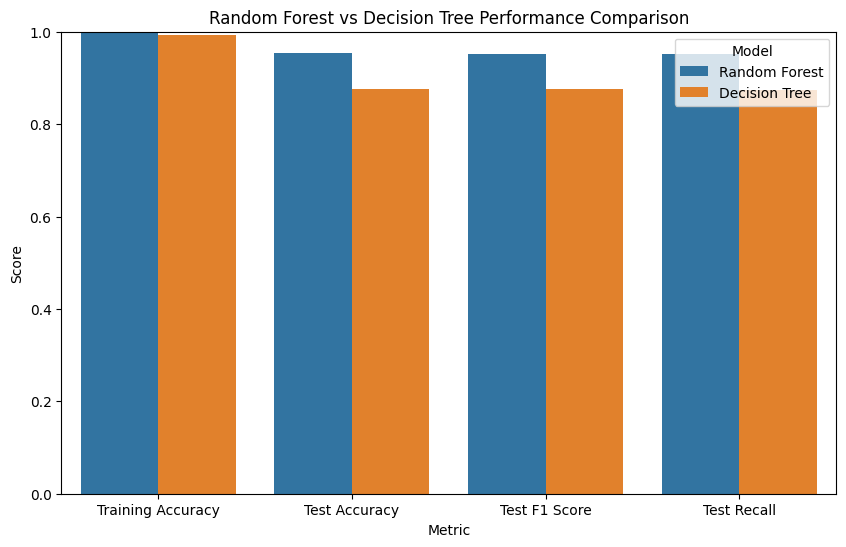

In [ ]:
# 13. Model comparison summary
# ---------------------------------------------

# Create a DataFrame summarizing metrics side by side for both models
comparison_df = pd.DataFrame({
    'Metric': ['Training Accuracy', 'Test Accuracy', 'Test F1 Score', 'Test Recall'],
    'Random Forest': [
        accuracy_score(y_train, y_train_pred_rf),
        accuracy_score(y_test, y_test_pred_rf),
        f1_score(y_test, y_test_pred_rf, average='macro'),
        recall_score(y_test, y_test_pred_rf, average='macro'),

    ],
    'Decision Tree': [
        accuracy_score(y_train, y_train_pred_dt),
        accuracy_score(y_test, y_test_pred_dt),
        f1_score(y_test, y_test_pred_dt, average='macro'),
        recall_score(y_test, y_test_pred_dt, average='macro'),

    ]
})

print("\n\n===== Model Comparison Summary =====")
print(comparison_df)

# Plot the comparison as bar charts for clear visual comparison
comparison_df_melt = comparison_df.melt(
    id_vars='Metric',        # Keep 'Metric' as identifier column
    var_name='Model',        # New column for model type (Random Forest or Decision Tree)
    value_name='Score'       # Column for metric values
)

plt.figure(figsize=(10,6))
sns.barplot(data=comparison_df_melt, x='Metric', y='Score', hue='Model')
plt.title('Random Forest vs Decision Tree Performance Comparison')
plt.ylim(0,1)   # Set y-axis limits between 0 and 1 for metric scale
plt.show()


Overall ROC AUC (Random Forest): 0.9860
Overall ROC AUC (Decision Tree): 0.9054


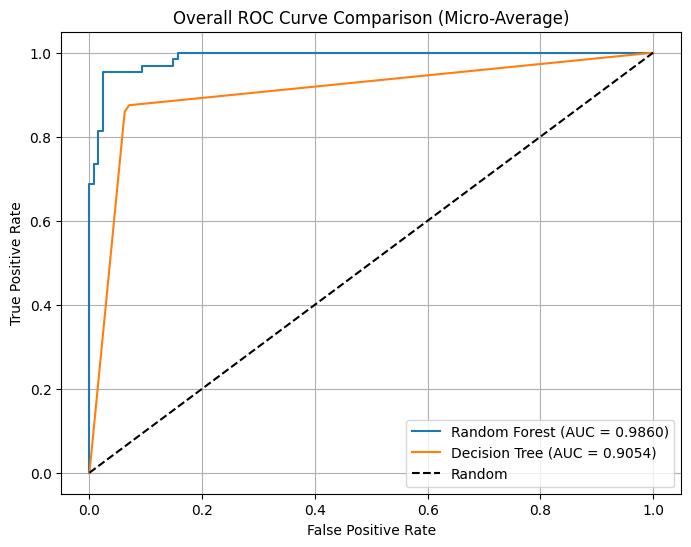

In [ ]:
#Compare Two ROC curve for overall random forest and decision tree
# For overall ROC AUC, we need to binarize the true labels for the multi-class problem
# and calculate the AUC score using the 'ovr' (One-vs-Rest) strategy, which is the default
# for roc_auc_score in multi-class problems when 'average' is not None.

# Binarize the true labels (y_test) for calculating ROC AUC
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Calculate ROC AUC for Random Forest (overall, One-vs-Rest strategy)
# We use y_test_proba_rf which contains the probabilities for each class
rf_roc_auc_overall = roc_auc_score(y_test_bin, y_test_proba_rf, average='macro')

# Calculate ROC AUC for Decision Tree (overall, One-vs-Rest strategy)
dt_roc_auc_overall = roc_auc_score(y_test_bin, y_test_proba_dt, average='macro')

print(f"\nOverall ROC AUC (Random Forest): {rf_roc_auc_overall:.4f}")
print(f"Overall ROC AUC (Decision Tree): {dt_roc_auc_overall:.4f}")

# To plot the overall ROC curve for multi-class, we need to compute the curve
# for each class and then often use an average or plot all of them.
# For a simple comparison of overall performance, showing the AUC values is often sufficient.
# Plotting an "overall" ROC curve for multi-class is not as straightforward as binary,
# and common methods involve aggregating curves or focusing on OVR/OVO macro/micro averages.
# A simple way to visualize overall performance could be to plot the micro-average ROC curve.

# Calculate ROC curve points (FPR, TPR) for Random Forest (micro-average)
# ravel() flattens the arrays
fpr_rf, tpr_rf, _ = roc_curve(y_test_bin.ravel(), y_test_proba_rf.ravel())

# Calculate ROC curve points (FPR, TPR) for Decision Tree (micro-average)
fpr_dt, tpr_dt, _ = roc_curve(y_test_bin.ravel(), y_test_proba_dt.ravel())

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_roc_auc_overall:.4f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {dt_roc_auc_overall:.4f})')

# Plot the diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Overall ROC Curve Comparison (Micro-Average)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# prompt: random forest with cross validation approach on iris data. Do not add preprcoessing and gridsearch cv steps etc. use acuracy , confusi9on matrix, recall etc. simplest code

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5) # 5-fold cross-validation

print("Cross-validation scores (accuracy):", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro') # Use 'macro' for multi-class

print("\nModel Evaluation on Test Data:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Recall (macro):", recall)



Cross-validation scores (accuracy): [0.95238095 0.95238095 1.         0.9047619  0.95238095]
Mean cross-validation accuracy: 0.9523809523809523

Model Evaluation on Test Data:
Accuracy: 0.8888888888888888
Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  4 11]]
Recall (macro): 0.8888888888888888
